In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("letter-recognition.data",sep = ",")
df.head()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [3]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values   

In [4]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [6]:
model=Sequential()
model.add(Dense(128, input_shape=(16,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\neils\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2635 - loss: 2.7170 - val_accuracy: 0.6455 - val_loss: 1.2869
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6967 - loss: 1.1162 - val_accuracy: 0.7330 - val_loss: 0.9847
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7447 - loss: 0.9105 - val_accuracy: 0.7615 - val_loss: 0.8652
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7822 - loss: 0.7731 - val_accuracy: 0.7738 - val_loss: 0.7749
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8004 - loss: 0.6998 - val_accuracy: 0.8067 - val_loss: 0.6642
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8201 - loss: 0.6262 - val_accuracy: 0.8188 - val_loss: 0.6005
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8356 - loss: 0.5638 - val_accuracy: 0.8345 - val_loss: 0.5532
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8496 - loss: 0.5151 - val_accuracy: 0.

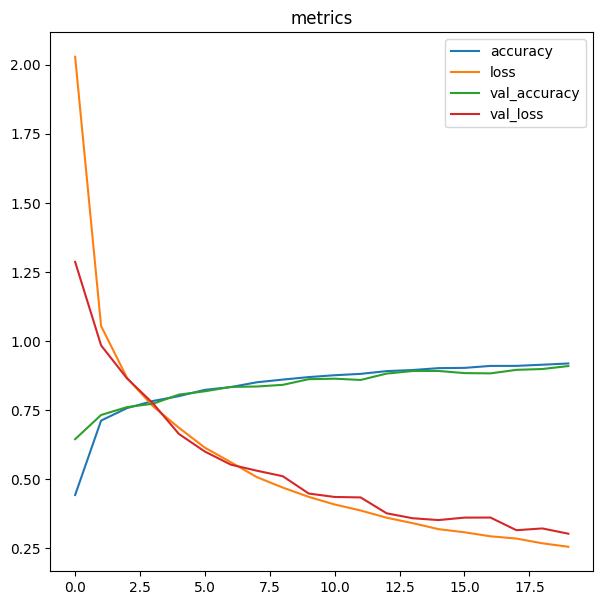

In [8]:
pd.DataFrame(history.history).plot(figsize=(7, 7))
plt.title('metrics')
plt.show()

In [9]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step


In [10]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[138,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,   2,   0],
       [  0, 147,   0,   0,   0,   0,   0,   1,   1,   0,   3,   0,   0,
          0,   0,   0,   0,   1,   1,   0,   0,   1,   0,   1,   0,   0],
       [  0,   0, 120,   0,   4,   1,   4,   1,   0,   0,   1,   0,   0,
          1,   3,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   4,   0, 128,   0,   0,   0,   7,   0,   3,   0,   0,   0,
          0,   1,   1,   0,   0,   1,   2,   1,   0,   0,   0,   0,   0],
       [  0,   0,   2,   0, 135,   1,   1,   1,   0,   0,   4,   0,   0,
          0,   0,   0,   0,   2,   1,   0,   0,   0,   0,   0,   0,   3],
       [  0,   2,   0,   1,   1, 140,   1,   1,   4,   1,   1,   0,   0,
          2,   0,   7,   0,   0,   1,   3,   0,   0,   0,   0,   0,   1],
       [  0,   2,   1,   3,   2,   0, 135,   2,   0,   0,   4,   0,   0,
          0,   2,   0,   3,   2,   2,   0,   

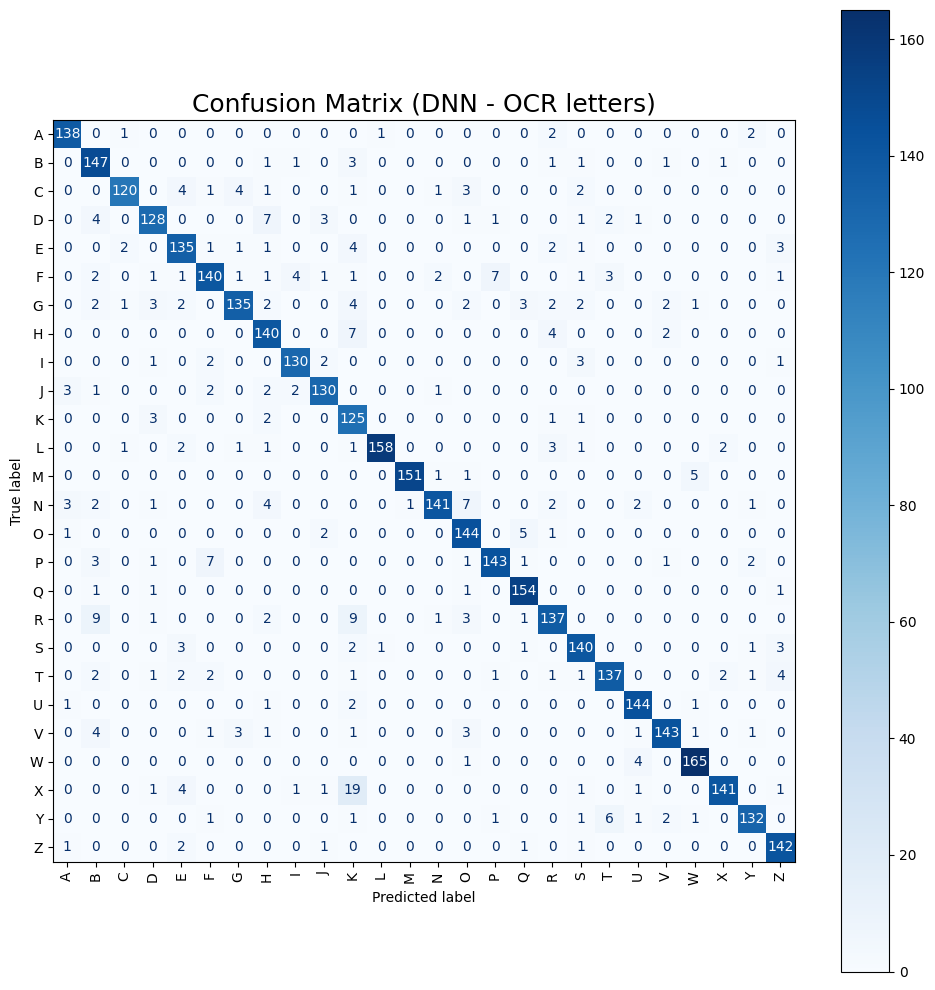

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90, values_format='d', ax=ax)
plt.title("Confusion Matrix (DNN - OCR letters)", fontsize=18)
plt.tight_layout()
plt.show()